In [1]:
from math import log
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from pandas import DataFrame
import re
from sqlalchemy import create_engine

%matplotlib inline

In [2]:
# Specify your own DB location and credentials here
host_db = "cal-patent-lab.chhaitskv8dz.us-west-2.rds.amazonaws.com"
username = "***REMOVED***"
password = ""
db = "***REMOVED***"

engine = create_engine("mysql://{}:{}@{}/{}".format(
    username, password, host_db, db))
connection = engine.connect()
q = "select patent_info.patent_id, patent_info.art_unit, " + \
    "datediff(patent_info.issue_date, patent_info.filing_date) as app2grant, " + \
    "datediff(ptab_cases.filing_date, patent_info.issue_date) as grant2challenge, " + \
    "datediff(ptab_cases.decision_date, ptab_cases.filing_date) as challenge2decision, " + \
    "ptab_cases.invalidated, ptab_cases.denied from patent_info, ptab_cases " + \
    "where patent_info.patent_id = ptab_cases.patent_id;"
patent_ptab_df = pd.read_sql(q, engine)
connection.close()

In [3]:
# Drop rows that have missing data in any field
clean_df = patent_ptab_df.dropna(axis=0, how="any")

In [4]:
# Compute mean and standard deviations for application-to-grant time
# for all 4 classes of case outcomes
inval      = clean_df[clean_df.invalidated == 1]
not_inval  = clean_df[clean_df.invalidated == 0]
denied     = clean_df[clean_df.denied == 1]
not_denied = clean_df[clean_df.denied == 0]

app2grant_data = {"not_invalidated" : not_inval.app2grant, "invalidated" : inval.app2grant,
                  "denied" : denied.app2grant, "not_denied" : not_denied.app2grant}
app2grant_df   = pd.DataFrame(data=app2grant_data)
print("Application-to-grant time")
print("Means")
print(app2grant_df.mean())
print("Standard deviations")
print(app2grant_df.std())

Application-to-grant time
Means
denied             1173.292804
invalidated        1076.357606
not_denied         1088.524841
not_invalidated    1173.913103
dtype: float64
Standard deviations
denied             793.170202
invalidated        703.324244
not_denied         704.402981
not_invalidated    786.261077
dtype: float64


In [5]:
# Makes plot emulate R styling
plt.style.use('ggplot')

# Simple function to prettify axes
# E.g.:
# ax = plt.subplot(111)
# simpleaxis(ax)
def simpleaxis(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()

Distributions of app-to-grant intervals


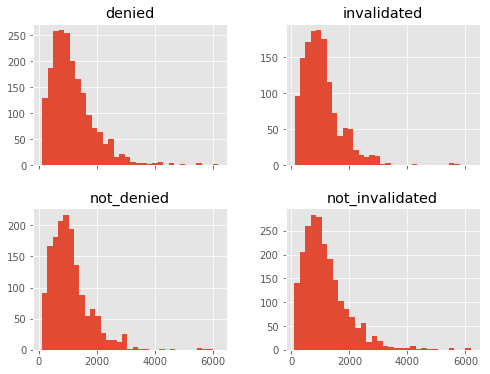

In [6]:
# Histograms of the distributions of application-to-grant intervals
print("Distributions of app-to-grant intervals")
hist = app2grant_df.hist(sharex=True, bins=32, figsize=(8,6))

In [7]:
# Compute mean and standard deviations for grant-to-challenge time
# for all 4 classes of case outcomes
grant2challenge_data = {'not_invalidated' : not_inval.grant2challenge, 'invalidated' : inval.grant2challenge, "not_denied" : not_denied.grant2challenge, "denied" : denied.grant2challenge}
grant2challenge_df = pd.DataFrame(data=grant2challenge_data)
print("Grant-to-challenge time")
print("Means")
print(grant2challenge_df.mean())
print("Standard deviations")
print(grant2challenge_df.std())

Grant-to-challenge time
Means
denied             2413.459057
invalidated        2452.178082
not_denied         2411.923567
not_invalidated    2387.929481
dtype: float64
Standard deviations
denied             1893.444105
invalidated        1836.010399
not_denied         1821.659026
not_invalidated    1878.351489
dtype: float64


Distributions of grant-to-challenge intervals


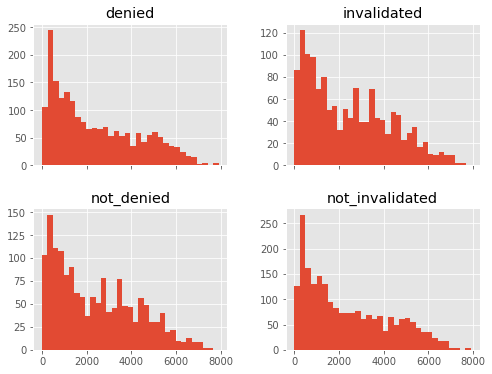

In [8]:
# Histograms of the distributions of grant-to-challenge intervals
print("Distributions of grant-to-challenge intervals")
hist = grant2challenge_df.hist(sharex=True, bins=32, figsize=(8,6))

In [9]:
# Compute mean and standard deviations for challenge-to-decision time
# for all 4 classes of case outcomes
challenge2decision_data = {'not_invalidated' : not_inval.challenge2decision, 'invalidated' : inval.challenge2decision, "not_denied" : not_denied.challenge2decision, "denied" : denied.challenge2decision}
challenge2decision_df = pd.DataFrame(data=challenge2decision_data)
print("Challenge-to-decision time")
print("Means")
print(challenge2decision_df.mean())
print("Standard deviations")
print(challenge2decision_df.std())

Challenge-to-decision time
Means
denied             160.298759
invalidated        177.270368
not_denied         177.628025
not_invalidated    161.967243
dtype: float64
Standard deviations
denied             41.613749
invalidated        28.160763
not_denied         27.720548
not_invalidated    40.815713
dtype: float64


Distributions of challenge-to-decision intervals


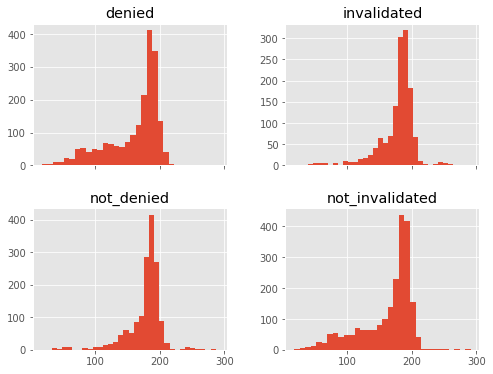

In [10]:
# Histograms of the distributions of challenge-to-decision intervals
print("Distributions of challenge-to-decision intervals")
hist = challenge2decision_df.hist(sharex=True, bins=32, figsize=(8,6))

Application-to-grant vs. grant-to-challenge, invalidated vs. not invalidated


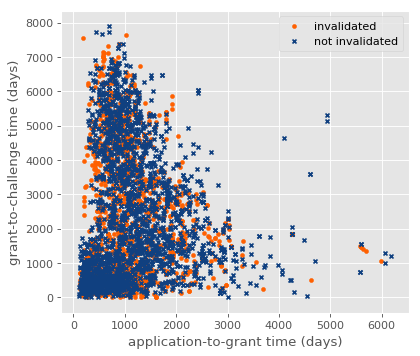

In [11]:
# Scatter plot of application-to-grant vs. grant-to-challenge time, invalidated vs. not invalidated
print("Application-to-grant vs. grant-to-challenge, invalidated vs. not invalidated")
plt.figure(figsize=(5.6, 5), dpi=80)
plt.scatter(app2grant_df.invalidated, grant2challenge_df.invalidated, s=13, color="#ff6000", marker="o")
plt.scatter(app2grant_df.not_invalidated, grant2challenge_df.not_invalidated, s=13, color="#104080", marker="x")
plt.xlabel('application-to-grant time (days)')
plt.ylabel('grant-to-challenge time (days)')
plt.gca().legend(labels=['invalidated', 'not invalidated'])
plt.savefig("./a2g_g2c-inval.png", dpi=250)

Application-to-grant vs. grant-to-challenge, denied vs. not denied


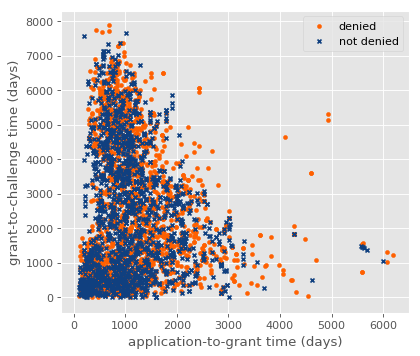

In [12]:
# Scatter plot of application-to-grant vs. grant-to-challenge time, invalidated vs. not invalidated
print("Application-to-grant vs. grant-to-challenge, denied vs. not denied")
plt.figure(figsize=(5.6, 5), dpi=80)
plt.scatter(app2grant_df.denied, grant2challenge_df.denied, s=13, color="#ff6000", marker="o")
plt.scatter(app2grant_df.not_denied, grant2challenge_df.not_denied, s=13, color="#104080", marker="x")
plt.xlabel('application-to-grant time (days)')
plt.ylabel('grant-to-challenge time (days)')
plt.gca().legend(labels=['denied', 'not denied'])
plt.savefig("./a2g-g2c-denied.png", dpi=250)

Application-to-grant vs. challenge-to-decision, invalidated vs. not invalidated


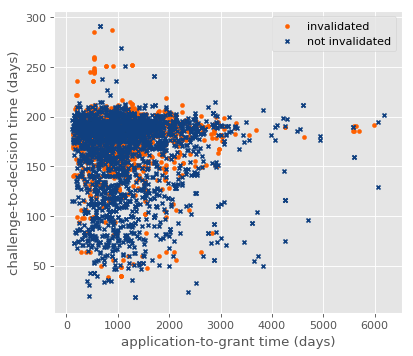

In [13]:
# Scatter plot of application-to-grant vs. challenge-to-decision time, invalidated vs. not invalidated
print("Application-to-grant vs. challenge-to-decision, invalidated vs. not invalidated")
plt.figure(figsize=(5.6, 5), dpi=80)
plt.scatter(app2grant_df.invalidated, challenge2decision_df.invalidated, s=13, color="#ff6000", marker="o")
plt.scatter(app2grant_df.not_invalidated, challenge2decision_df.not_invalidated, s=13, color="#104080", marker="x")
plt.xlabel('application-to-grant time (days)')
plt.ylabel('challenge-to-decision time (days)')
plt.gca().legend(labels=['invalidated', 'not invalidated'])
plt.savefig("./a2g_c2d-inval.png", dpi=250)

Application-to-grant vs. challenge-to-decision, denied vs. not denied


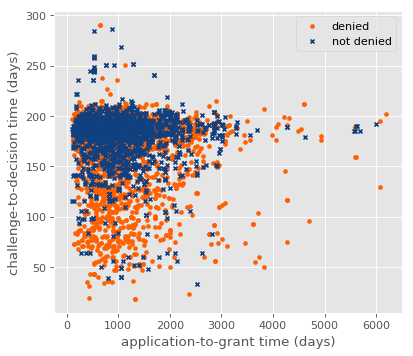

In [14]:
# Scatter plot of application-to-grant vs. challenge-to-decision time, denied vs. not denied
print("Application-to-grant vs. challenge-to-decision, denied vs. not denied")
plt.figure(figsize=(5.6, 5), dpi=80)
plt.scatter(app2grant_df.denied, challenge2decision_df.denied, s=13, color="#ff6000", marker="o")
plt.scatter(app2grant_df.not_denied, challenge2decision_df.not_denied, s=13, color="#104080", marker="x")
plt.xlabel('application-to-grant time (days)')
plt.ylabel('challenge-to-decision time (days)')
plt.gca().legend(labels=['denied', 'not denied'])
plt.savefig("./a2g_c2d-denied.png", dpi=250)

Grant-to-challenge vs. challenge-to-decision, invalidated vs. not invalidated


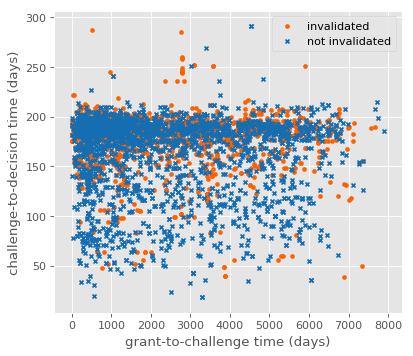

In [15]:
# Scatter plot of grant-to-challenge vs. challenge-to-decision time, invalidated vs. not invalidated
print("Grant-to-challenge vs. challenge-to-decision, invalidated vs. not invalidated")
plt.figure(figsize=(5.6, 5), dpi=80)
plt.scatter(grant2challenge_df.invalidated, challenge2decision_df.invalidated, s=13, color="#ff6000", marker="o")
plt.scatter(grant2challenge_df.not_invalidated, challenge2decision_df.not_invalidated, s=13, color="#156eb1", marker="x")
plt.xlabel('grant-to-challenge time (days)')
plt.ylabel('challenge-to-decision time (days)')
plt.gca().legend(labels=['invalidated', 'not invalidated'])
plt.savefig("./g2c-c2d-inval.png", dpi=250)

Grant-to-challenge vs. challenge-to-decision, denied vs. not denied


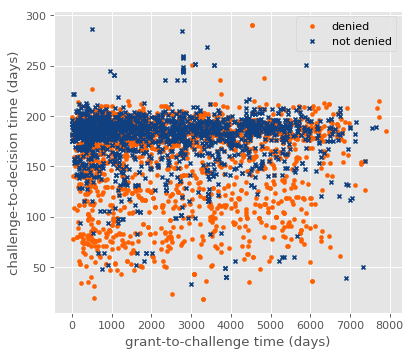

In [16]:
# Scatter plot of grant-to-challenge vs. challenge-to-decision time, denied vs. not denied
print("Grant-to-challenge vs. challenge-to-decision, denied vs. not denied")
plt.figure(figsize=(5.6, 5), dpi=80)
plt.scatter(grant2challenge_df.denied, challenge2decision_df.denied, s=13, color="#ff6000", marker="o")
plt.scatter(grant2challenge_df.not_denied, challenge2decision_df.not_denied, s=13, color="#104080", marker="x")
plt.xlabel('grant-to-challenge time (days)')
plt.ylabel('challenge-to-decision time (days)')
plt.gca().legend(labels=['denied', 'not denied'])
plt.savefig("./g2c-c2d-denied.png", dpi=250)